# Descriptive Statistics 

In [72]:
# Access libraries 
import numpy as np
import pandas as pd
import seaborn as sb
# Seaborn color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html 
import matplotlib.pyplot as plt
import sklearn 

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [73]:
# Allow visualalization 
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

# Goal: Create prediction models for survival on Titanic
### Final submission should look like survival.csv file
### Create predictive model using data from train dataset -> end goal  with 0 = death; 1 = survived for each passenger Id

In [74]:
# Learning guide: http://www.data-mania.com/blog/logistic-regression-example-in-python/ 

In [75]:
# Add survival dataset
# This is what the final submission model should look like. 
# It's the outcome of prediction models that estimate survival based on gender. 
# Note: remember to add sep=',' or data will be hard to read
survival = pd.read_csv("C:\\Users\\loret\\Desktop\\DataSciencePrep\\Kaggle\\Titanic\\survival.csv", sep=',')
survival.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [76]:
# Add test dataset
passInfo = pd.read_csv("C:\\Users\\loret\\Desktop\\DataSciencePrep\\Kaggle\\Titanic\\test.csv")
passInfo.head(10)

# Labels
# sibsp = number of siblings / spouses aboard the Titanic	
# parch = number of parents / children aboard the Titanic
# ticket = Ticket number
# fare = Passenger fare
# cabin = Cabin number
# embarked = Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [77]:
# Add train dataset 
train = pd.read_csv("C:\\Users\\loret\\Desktop\\DataSciencePrep\\Kaggle\\Titanic\\train.csv")
train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
# Get the length to see if we have the same number of observations in each dataset
len(survival)

418

# Variable Overview/ Data Dictionary 

<li><strong>survival</strong></li>
Survival (0 = No, 1 = Yes) <br>
<li><strong>pclass</strong></li>
Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd class)

<li><strong>sex</strong></li>
Sex	(male= / female)

<li><strong>Age</strong></li>
Age in years

<li><strong>sibsp</strong></li>
number of of siblings / spouses aboard the Titanic

<li><strong>parch</strong></li>
number of parents / children aboard the Titanic	

<li><strong>ticket</strong></li>
Ticket number	

<li><strong>fare</strong></li>
Passenger fare	

<li><strong>cabin</strong></li>
Cabin number

<li><strong>embarked</strong></li>	
Port of Embarkation <br>
(C = Cherbourg, Q = Queenstown, S = Southampton) 

<li><strong>pclass</strong></li>
A proxy for socio-economic status(SES) <br>
(1st = Upper / 2nd = Middle /3rd = Lower)

<li><strong>Age</strong></li>
Age is fractional if less than 1 <br>
If the age is estimated, is it in the form of xx.5

<li><strong>sibs </strong></li>
The dataset defines family relations in this way...
<ol>A. Sibling</ol>- brother, sister, stepbrother, stepsister
<ol>B. Spouse </ol>- husband, wife (mistresses and fiancés were ignored)

<li><strong>parch:</strong></li>- The dataset defines family relations in this way...
<ol>A. Parent = mother, father</ol>
<ol>B. Child = daughter, son, stepdaughter, stepson </ol>
Note: Some children traveled only with a nanny, therefore parch=0 for them.



In [79]:
len(passInfo)

418

In [80]:
len(train)

891

In [81]:
# Find how many unique passenger ids there are 
survival_Rates = passInfo['PassengerId'].unique().tolist()
len(survival_Rates)

418

In [82]:
# Merge dataframes: passInfo & train
passSurvival = passInfo.merge(survival, on='PassengerId', how='inner')
passSurvival

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


### Get rid of Nulls

In [83]:
passSurvival.shape

(418, 12)

In [84]:
# Search for Nulls
passSurvival.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
Survived       False
dtype: bool

In [85]:
# Drop nulls
passSurvival = passSurvival.dropna()
passSurvival

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,1
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,1
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,1
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,1
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,0
34,926,1,"Mock, Mr. Philipp Edmund",male,30.0,1,0,13236,57.7500,C78,C,0
44,936,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.0,1,0,11753,52.5542,D19,S,1
46,938,1,"Chevre, Mr. Paul Romaine",male,45.0,0,0,PC 17594,29.7000,A9,C,0
48,940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C,1
50,942,1,"Smith, Mr. Lucien Philip",male,24.0,1,0,13695,60.0000,C31,S,0


In [86]:
passSurvival.shape

(87, 12)

In [87]:
# Check for nulls one more time - coast is clear for analyis & visualization!
passSurvival.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
Survived       False
dtype: bool

In [88]:
passSurvival.describe()
# Some questions I might wanna answer with this data set
# 1. If you paid a higher fare, did you have a higher survival rate on the Titanic?
# 2. 

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,1102.712644,1.137931,39.247126,0.597701,0.482759,98.109198,0.505747
std,126.751901,0.435954,15.218730,0.637214,0.860801,88.177319,0.502865
min,904.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,986.000000,1.000000,27.000000,0.000000,0.000000,35.339600,0.000000
50%,1094.000000,1.000000,39.000000,1.000000,0.000000,71.283300,1.000000
75%,1216.000000,1.000000,50.000000,1.000000,1.000000,135.066650,1.000000
max,1306.000000,3.000000,76.000000,3.000000,4.000000,512.329200,1.000000


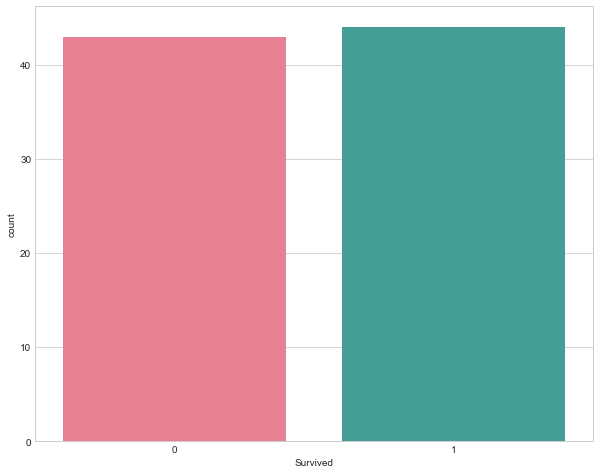

In [89]:
# Check to see if "Survived"is a binary variable from train dataset 
# keep in mind, this output reflects the fact that I removed missing data 
# Graph may not be accurate..
sb.countplot(x='Survived',data=passSurvival, palette='husl')

<h3>Remove nulls from test dataset</h3>


In [90]:
len(passInfo)

418

In [91]:
passInfo.shape

(418, 11)

In [92]:
passInfo.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [93]:
# Drop nulls
cpassInfo = passInfo.dropna()

In [94]:
cpassInfo.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [95]:
cpassInfo.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,1102.712644,1.137931,39.247126,0.597701,0.482759,98.109198
std,126.751901,0.435954,15.218730,0.637214,0.860801,88.177319
min,904.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,986.000000,1.000000,27.000000,0.000000,0.000000,35.339600
50%,1094.000000,1.000000,39.000000,1.000000,0.000000,71.283300
75%,1216.000000,1.000000,50.000000,1.000000,1.000000,135.066650
max,1306.000000,3.000000,76.000000,3.000000,4.000000,512.329200


In [96]:
print(list(cpassInfo.columns))

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


### Check Nulls in Train Data Set

In [97]:
# View details on records in dataset 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [98]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [120]:
train.isnull().sum()
# Notice that Age & Cabin have th most missing/Null values...

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Variable Overview/ Data Dictionary 
### For analysis, remove cabin, passengerId, Name & Ticket 

<li><strong>survival</strong></li>
Survival (0 = No, 1 = Yes) <br>
<li><strong>pclass</strong></li>
Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd class)

<li><strong>sex</strong></li>
Sex	(male= / female)

<li><strong>Age</strong></li>
Age in years

<li><strong>sibsp</strong></li>
number of of siblings / spouses aboard the Titanic

<li><strong>parch</strong></li>
number of parents / children aboard the Titanic	

<li><strong>ticket</strong></li>
Ticket number	

<li><strong>fare</strong></li>
Passenger fare	

<li><strong><s>cabin</s></strong></li>
Cabin number

<li><strong>embarked</strong></li>	
Port of Embarkation <br>
(C = Cherbourg, Q = Queenstown, S = Southampton) 

<li><strong>pclass</strong></li>
A proxy for socio-economic status(SES) <br>
(1st = Upper / 2nd = Middle /3rd = Lower)

<li><strong>Age</strong></li>
Age is fractional if less than 1 <br>
If the age is estimated, is it in the form of xx.5

<li><strong>sibs </strong></li>
The dataset defines family relations in this way...
<ol>A. Sibling</ol>- brother, sister, stepbrother, stepsister
<ol>B. Spouse </ol>- husband, wife (mistresses and fiancés were ignored)

<li><strong>parch:</strong></li>- The dataset defines family relations in this way...
<ol>A. Parent = mother, father</ol>
<ol>B. Child = daughter, son, stepdaughter, stepson </ol>
Note: Some children traveled only with a nanny, therefore parch=0 for them.


In [121]:
# Drop useless variables - cabin, passengerId, name, ticket 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [124]:
train_less = train.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], 1)
train_less.tail(50) # only relevent variables here 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
841,0,2,male,16.0,0,0,10.5000,S
842,1,1,female,30.0,0,0,31.0000,C
843,0,3,male,34.5,0,0,6.4375,C
844,0,3,male,17.0,0,0,8.6625,S
845,0,3,male,42.0,0,0,7.5500,S
846,0,3,male,NaN,8,2,69.5500,S
847,0,3,male,35.0,0,0,7.8958,C
848,0,2,male,28.0,0,1,33.0000,S
849,1,1,female,NaN,1,0,89.1042,C
850,0,3,male,4.0,4,2,31.2750,S


### Input Missing Values

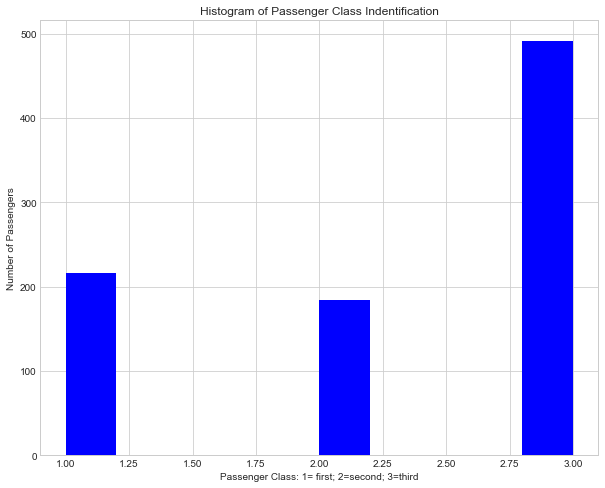

In [125]:
# Histogram of Pclass to see frequency of class membership 
# Clearly most in 3rd class 
plt.hist(train_less['Pclass'], 10, normed=False, facecolor='blue') # Create histogram of class 

# label it
plt.xlabel('Passenger Class: 1= first; 2=second; 3=third')
plt.ylabel('Number of Passengers')
plt.title('Histogram of Passenger Class Indentification')

# plot axis 
plt.grid(True)


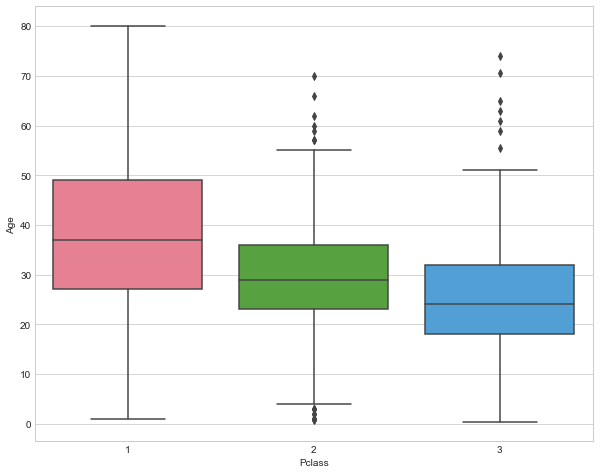

In [126]:
# Find relation between variables in dataset using a boxplot
# From boxplot, looks like 1st class is skewed to the right (much older on average)
# Lowest class(3rd) is the youngest (median age is mid-twenties)
sb.boxplot(x='Pclass', y='Age', data=train_less, palette='husl')

In [137]:
# Get summary of boxplot using describe function 
train_less['Age'].groupby(train_less['Pclass']).describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,38.062130,13.737970,0.92,29.00,37.0,47.25,80.0
2,184.0,29.825163,13.575362,0.67,23.00,29.0,36.00,70.0
3,491.0,24.824684,10.632997,0.42,20.25,24.0,29.00,74.0


<h3>Boxplot Interpretation / Input Missing Values</h3>
<p> Younger passengers more likely to be in 3rd class. Older passengers more likely to be in 1st class. Looks like there is a loose relationship between age and class. Use this information to provide estimates of any missing values</p>

### Create Functions

In [140]:
# Write function to use to input missing values using means
# Three categories - if/elif + else 
def mean_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30  # rounded 29.82
        else:
            return 25 # rounded 24.8

In [128]:
# Write funtion to check value of Pclass and assign to null values 
# an age using median age 
def approx_age(cols):
    Age = cols[0] # is this for y?
    Pclass = cols[1] # for x?
    
    if pd.isnull(Age):  # if age in array is a null value
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:                    # python really cares about indentation...
        return Age

### Applied Functions

In [129]:
# Apply function
train_less['Age'] = train_less[['Age', 'Pclass']].apply(approx_age, axis=1)


In [130]:
train_less['Age'] # Yeah! It worked now...messed up on the code earlier. 

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      24.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     29.0
18     31.0
19     24.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     24.0
27     19.0
28     24.0
29     24.0
       ... 
861    21.0
862    48.0
863    24.0
864    24.0
865    42.0
866    27.0
867    31.0
868    24.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    24.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [131]:
# Post function being applied, check to see if there are any nulls in age
train_less['Age'].isnull()
train_less['Age'].isnull().sum()
# Hmmmm....not really working - there shouldn't be any null values
# Figure out what went wrong...

0

In [139]:
train_less['Age'].groupby(train_less['Pclass']).describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,38.062130,13.737970,0.92,29.00,37.0,47.25,80.0
2,184.0,29.825163,13.575362,0.67,23.00,29.0,36.00,70.0
3,491.0,24.824684,10.632997,0.42,20.25,24.0,29.00,74.0


In [108]:
# From cpassInfo.describe() it looks like the mean age was 39 years old
# From SibSp, most didn't have spouse/sibling (mean = 0.59; 50th percentile = 1)

<h2>Predictive Analytics</h2>
<p> Figure out how these six variables (PassengerId, Pclass, Age, SibSp, Parch, Fare) predict survival</p>
<p>Goal: Use a Logistic Regression to make the prediction</p>

In [109]:
# Source: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 